In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy import stats

# Se pondrá como comentado los datos observados a tener en cuenta


# 2. Carga y análisis de datos

In [ ]:
df = pd.read_csv('/content/Base_SolicitudesCreditoEfectivo_201307_201505.csv', sep = ';')

In [ ]:
df.head()

# 31 variables dentro de las cuales el target es 'FLG_DEFAULT_12M'

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,SEGMENTOCLIENTE,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,...,INGRESO_CLIENTE,PROFESION,ZONA_DEL_DESEMBOLSO,ESTADO_CIVIL,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
0,201402,1,7116.681318,48,0,NaN,0,CLIENTES ORO,1,0,...,2526.246600,INGENIERO,UCAYALI,SOL,26.0,236.983971,5600.0,170.0,0.0,0.0
1,201404,2,1616.555000,60,0,NaN,0,CLIENTES ORO,1,0,...,2895.761372,TECNICO,AREQUIPA,CAS,49.0,62.089650,19250.0,170.0,0.0,0.0
2,201403,3,8082.775000,48,0,NaN,0,CLIENTES ORO,1,0,...,1474.419056,INGENIERO DE MINAS,PUNO,SOL,33.0,22.894893,10900.0,80.0,0.0,0.0
3,201307,4,10186.990760,48,0,201403.0,1,CLIENTES ORO,0,0,...,1992.756892,TECNICO,CUZCO,SOL,25.0,244.267800,10900.0,80.0,0.0,0.0
4,201401,5,10777.033330,48,0,NaN,0,CLIENTES PLATINUM SEGM 2,1,0,...,1680.938223,TEC MECANICO AUTOMOTRIZ,LIMA_ESTE,CAS,57.0,17.430000,16300.0,170.0,0.0,0.0


In [ ]:
df.info()
# aprox 32mil registros, donde algunas variables no tienen un registro completo
# Tipo de datos object: categórica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CODMES                   31944 non-null  int64  
 1   CODSOLICITUD             31944 non-null  int64  
 2   DEUDA                    31944 non-null  float64
 3   PLAZO_CREDITO            31944 non-null  int64  
 4   FLG_GARANTIA             31944 non-null  int64  
 5   MIN_MES_DE_DEFAULT       3449 non-null   float64
 6   FLG_DEFAULT_12M          31944 non-null  int64  
 7   SEGMENTOCLIENTE          31944 non-null  object 
 8   TARJETA_RELACIONADA      31944 non-null  int64  
 9   VEHICULAR_RELACIONADA    31944 non-null  int64  
 10  HIPOTECARIO_RELACIONADA  31944 non-null  int64  
 11  ATRASO_MAXIMO_ULT_6M     31944 non-null  int64  
 12  ATRASO_MAXIMO_ULT_12M    31941 non-null  float64
 13  ATRASO_MAXIMO_ULT_24M    31937 non-null  float64
 14  MESES_AHORROS_ULT_6M  

In [ ]:
# Target
df['FLG_DEFAULT_12M'].value_counts()

,count
FLG_DEFAULT_12M,
0,29920
1,2024


In [ ]:
# En porcentaje
df['FLG_DEFAULT_12M'].value_counts(1)

# aprox 6.3% de personas cayeron en 1 (default/no pagaron)

,proportion
FLG_DEFAULT_12M,
0,0.936639
1,0.063361


<Axes: xlabel='FLG_DEFAULT_12M', ylabel='count'>

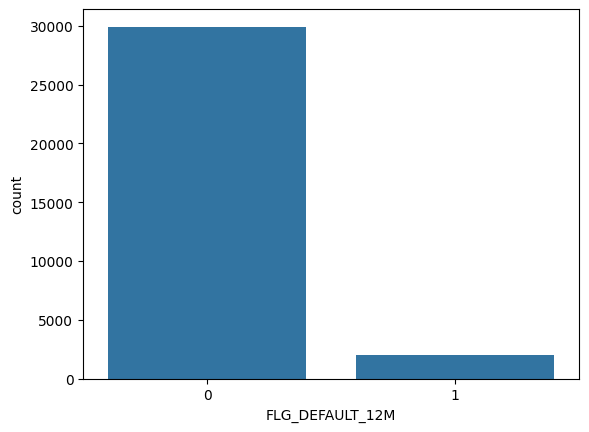

In [ ]:
# Distribución cuantos fueron default y cuantos no
sns.countplot(data=df, x='FLG_DEFAULT_12M')

In [ ]:
# Proporción
target_count = df['FLG_DEFAULT_12M'].value_counts()
print('Class 0 (buen pagador):', target_count[0])
print('Class 1 (Mora_12M):', target_count[1])
print('Proporción:', round(target_count[0]/target_count[1],2), ':1')

Class 0 (buen pagador): 29920
Class 1 (Mora_12M): 2024
Proporción: 14.78 :1


# 3. Analisis

In [ ]:
# Resumen estadístico de variables numéricas
df.describe()

,CODMES,CODSOLICITUD,DEUDA,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,FLG_DEFAULT_12M,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,...,FLG_PDH,NUMERO_DE_PAGOS_PDH,MONTO_TC_SISTEMA,INGRESO_CLIENTE,EDAD_T,CUOTA,LINEA_DE_TC,MONTO_TC_MEMBRESIA,FLG_TC_VISA,FLG_TC_MC
count,31944.000000,31944.000000,31944.000000,31944.000000,31944.000000,3449.000000,31944.000000,31944.000000,31944.000000,31944.000000,...,31944.000000,31944.000000,31944.000000,31166.000000,30954.000000,31294.000000,31294.000000,31294.000000,31294.000000,31294.000000
mean,201405.646287,15972.500000,5769.284906,39.996588,0.041917,201490.518991,0.063361,0.623403,0.010393,0.022915,...,0.839751,16.291948,5577.705221,3247.384821,36.855689,687.000303,12531.112226,124.256758,0.378092,0.385345
std,68.034515,9221.582836,5848.504517,15.623734,0.200403,69.327456,0.243615,0.484540,0.101417,0.149635,...,0.366843,9.419303,14303.455224,2584.502250,9.915298,1223.568638,12179.848525,75.954899,0.484918,0.486685
min,201307.000000,1.000000,8.791365,6.000000,0.000000,201310.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,465.839706,20.000000,0.000000,4.000000,60.000000,0.000000,0.000000
25%,201312.000000,7986.750000,1602.717111,24.000000,0.000000,201410.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,7.000000,0.000000,1671.818517,29.000000,41.640160,4200.000000,64.000000,0.000000,0.000000
50%,201406.000000,15972.500000,3768.298333,48.000000,0.000000,201505.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,24.000000,470.910000,2260.061985,35.000000,233.620086,9560.500000,100.000000,0.000000,0.000000
75%,201412.000000,23958.250000,7786.406583,48.000000,0.000000,201510.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,24.000000,4093.860000,3715.128475,42.000000,769.646152,17267.000000,170.000000,1.000000,1.000000
max,201505.000000,31944.000000,205483.523000,60.000000,1.000000,201609.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,24.000000,239331.600000,25503.288070,72.000000,21849.784290,154400.000000,500.000000,1.000000,1.000000


In [ ]:
# Separando variables categóricas
categorical_attributes = df.select_dtypes(include=['object'])

In [ ]:
categorical_attributes.info()

# Vemos null en PROFESION, ZONA_DEL_DESEMBOLSO, ESTADO_CIVIL

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31944 entries, 0 to 31943
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   SEGMENTOCLIENTE      31944 non-null  object
 1   PROFESION            31604 non-null  object
 2   ZONA_DEL_DESEMBOLSO  30954 non-null  object
 3   ESTADO_CIVIL         30954 non-null  object
dtypes: object(4)
memory usage: 998.4+ KB


In [ ]:
# Cantidad de null en cada variable
categorical_attributes.isna().sum()

,0
SEGMENTOCLIENTE,0
PROFESION,340
ZONA_DEL_DESEMBOLSO,990
ESTADO_CIVIL,990


## Análisis univariado


### a. Segmento Cliente
Analizaremos la variable categórica "Segmento Cliente"

In [ ]:
# Segmentos del cliente
df['SEGMENTOCLIENTE'].value_counts()

#La cantidad de clientes Black-Cat2, Masivos, Black-Cat1 son mínimas comparadas con las demás

,count
SEGMENTOCLIENTE,
CLIENTES ORO,22101
CLIENTES PLATINUM SEGM 2,9438
CLIENTES SIGNATURE,284
CLIENTES PLATINUM SEGM 1,115
CLIENTES BLACK - CAT2,2
CLIENTES MASIVOS,2
CLIENTES BLACK - CAT1,2


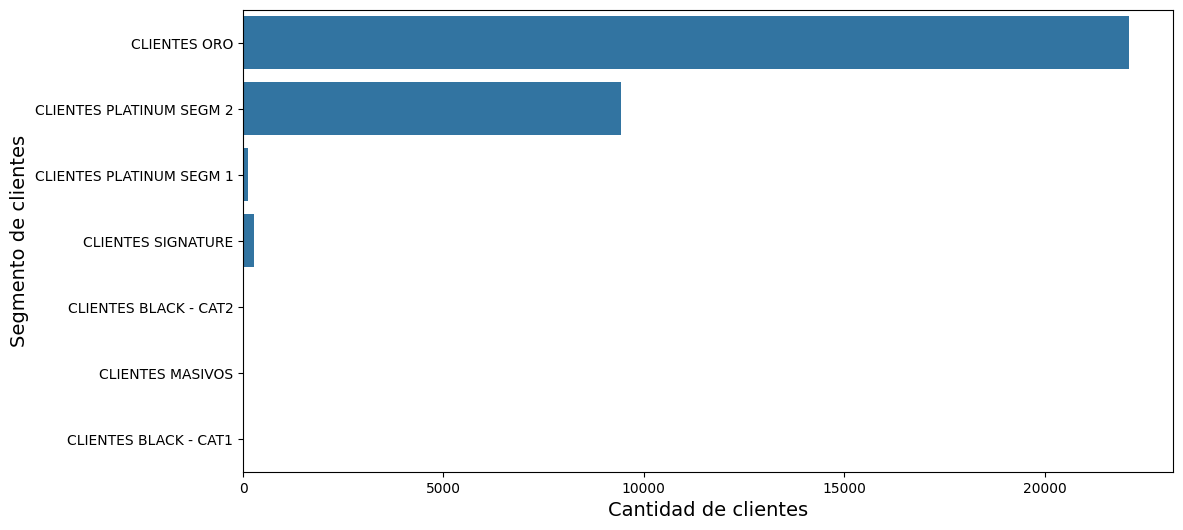

,proportion
SEGMENTOCLIENTE,
CLIENTES ORO,0.691867
CLIENTES PLATINUM SEGM 2,0.295455
CLIENTES SIGNATURE,0.008891
CLIENTES PLATINUM SEGM 1,0.003600
CLIENTES BLACK - CAT2,0.000063
CLIENTES MASIVOS,0.000063
CLIENTES BLACK - CAT1,0.000063


In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='SEGMENTOCLIENTE')

plt.xlabel('Cantidad de clientes', fontsize=14)
plt.ylabel('Segmento de clientes', fontsize=14)

plt.show()

categorical_attributes['SEGMENTOCLIENTE'].value_counts(1)

Pasaremos a ver su comportamiento respecto al target, realizando la sgte tabla cruzada:

In [ ]:
# Seleccionamos dos columnas del DataFrame:
df[['FLG_DEFAULT_12M','SEGMENTOCLIENTE']].groupby(['SEGMENTOCLIENTE'], as_index=False)\
                                          .agg(['count','sum','mean'])\
                                          .sort_values(by=('FLG_DEFAULT_12M','mean'),ascending=False)

# agg(): Aplica funciones múltiples o personalizadas
# as_index=False mantendrá SEGMENTOCLIENTE como columna en el df, no como índice.

SEGMENTOCLIENTE FLG_DEFAULT_12M                
                                      count   sum      mean
2          CLIENTES MASIVOS               2     1  0.500000
3              CLIENTES ORO           22101  1617  0.073164
4  CLIENTES PLATINUM SEGM 1             115     5  0.043478
5  CLIENTES PLATINUM SEGM 2            9438   396  0.041958
6        CLIENTES SIGNATURE             284     5  0.017606
1     CLIENTES BLACK - CAT2               2     0  0.000000
0     CLIENTES BLACK - CAT1               2     0  0.000000

Realiazaremos un mapeo de valores categóricos a numéricos:
0: Oro
1: Platinum
2: Signature
3: Black, Masivos, Otros y vacío

In [ ]:
# Mapping a 'Segmento cliente'
df['SEGMENTOCLIENTE_Encoder'] = df['SEGMENTOCLIENTE'].map({'CLIENTES ORO':0,
                                                            'CLIENTES PLATINUM SEGM 1':1,
                                                            'CLIENTES PLATINUM SEGM 2':1,
                                                            'CLIENTES SIGNATURE':2,
                                                            'CLIENTES BLACK - CAT1':3,
                                                            'CLIENTES BLACK - CAT2':3,
                                                            'CLIENTES MASIVOS':3,
                                                            'Other':3,'':3}).astype(int)

# .map({...}): convierte cada segmento de cliente en un número
# .astype(int): nueva columna sea de tipo entero

### b. Zona de desembolso
Analizaremos la variable 'ZONA_DEL_DESEMBOLSO'

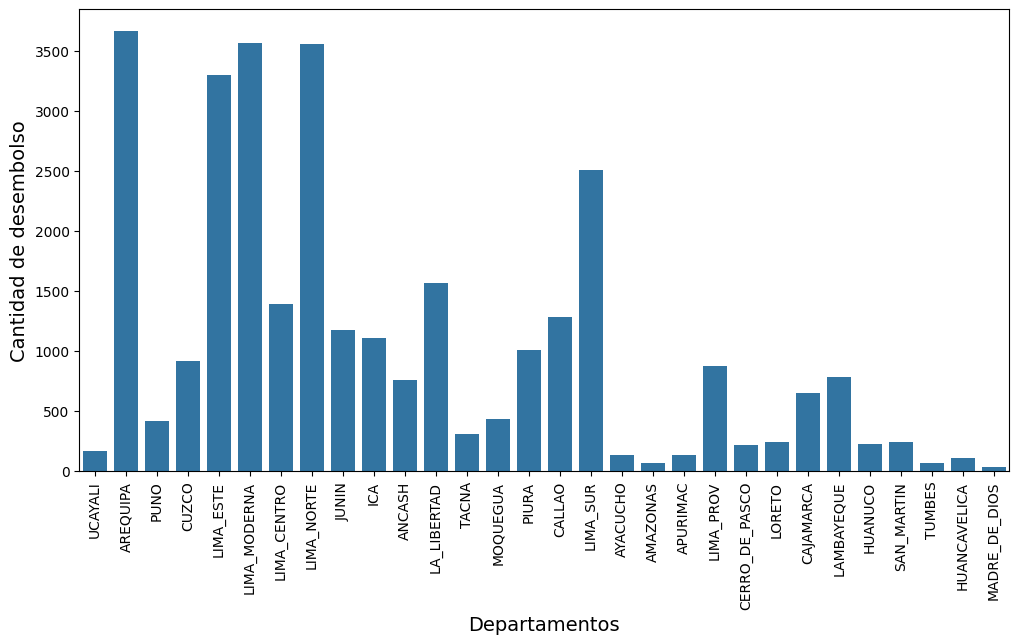

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'ZONA_DEL_DESEMBOLSO')

plt.xticks(rotation=90)
plt.xlabel('Departamentos', fontsize=14)
plt.ylabel('Cantidad de desembolso', fontsize=14)

plt.show()

In [ ]:
# Porcentaje de contribuciones por departamento
categorical_attributes['ZONA_DEL_DESEMBOLSO'].value_counts(1)

,proportion
ZONA_DEL_DESEMBOLSO,
AREQUIPA,0.118369
LIMA_MODERNA,0.115236
LIMA_NORTE,0.115042
LIMA_ESTE,0.106610
LIMA_SUR,0.080959
LA_LIBERTAD,0.050559
LIMA_CENTRO,0.044938
CALLAO,0.041449
JUNIN,0.037895


In [ ]:
# Análisis de 'ZONA_DEL_DESEMBOLSO' respecto al target
df[['FLG_DEFAULT_12M', 'ZONA_DEL_DESEMBOLSO']]\
                                            .groupby(['ZONA_DEL_DESEMBOLSO'], as_index=False)\
                                            .agg(['count','sum','mean'])\
                                            .sort_values(by=('FLG_DEFAULT_12M','mean'), ascending=False)

# count(): Total de clientes en el segmento
# sum(): Número de clientes que no pagaron (valor 1)
# mean(): Proporción de clientes que no pagaron (default)

ZONA_DEL_DESEMBOLSO FLG_DEFAULT_12M               
                                 count  sum      mean
21              LORETO             245   46  0.187755
0             AMAZONAS              65    9  0.138462
1               ANCASH             762   69  0.090551
6               CALLAO            1283  116  0.090413
28              TUMBES              71    6  0.084507
29             UCAYALI             172   14  0.081395
5            CAJAMARCA             652   50  0.076687
24               PIURA            1012   77  0.076087
18          LIMA_NORTE            3561  256  0.071890
10             HUANUCO             223   16  0.071749
15         LIMA_CENTRO            1391   98  0.070453
16           LIMA_ESTE            3300  220  0.066667
13          LAMBAYEQUE             785   51  0.064968
20            LIMA_SUR            2506  156  0.062251
12               JUNIN            1173   73  0.062234
26          SAN_MARTIN             247   15  0.060729
19           LIMA_PROV             880   53  0.060227
8                CUZCO             920   54  0.058696
4             AYACUCHO             138    8  0.057971
14         LA_LIBERTAD            1565   90  0.057508
11                 ICA            1108   62  0.055957
3             AREQUIPA            3664  196  0.053493
2             APURIMAC             139    7  0.050360
27               TACNA             309   15  0.048544
9         HUANCAVELICA             107    5  0.046729
23            MOQUEGUA             437   18  0.041190
17        LIMA_MODERNA            3567  144  0.040370
25                PUNO             417   16  0.038369
7       CERRO_DE_PASCO             216    8  0.037037
22       MADRE_DE_DIOS              39    1  0.025641

### c. Estado civil
Analizaremos el la variable 'ESTADO_CIVIL' respecto al target

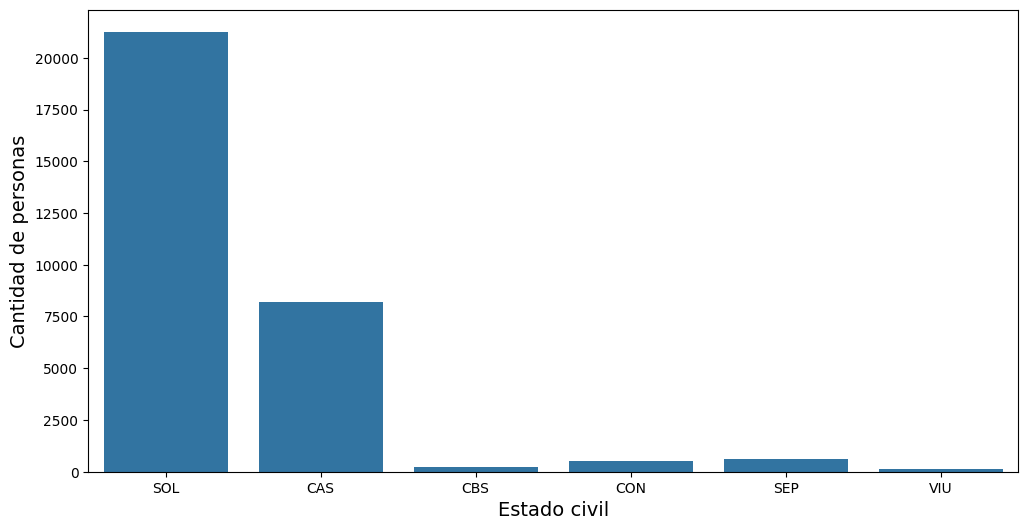

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='ESTADO_CIVIL')

plt.xlabel('Estado civil', fontsize=14)
plt.ylabel('Cantidad de personas', fontsize=14)

plt.show()

In [ ]:
# Analizando respecto a la variable target
df[['ESTADO_CIVIL','FLG_DEFAULT_12M']].groupby(['ESTADO_CIVIL'], as_index=False)\
                                      .agg(['count','sum','mean'])\
                                      .sort_values(by=('FLG_DEFAULT_12M','mean'),ascending=False)

ESTADO_CIVIL FLG_DEFAULT_12M                
                         count   sum      mean
4          SOL           21258  1526  0.071785
1          CBS             232    14  0.060345
2          CON             524    30  0.057252
3          SEP             594    31  0.052189
0          CAS            8208   344  0.041910
5          VIU             138     4  0.028986

### d. Profesión
Analizaremos la variable PROFESION


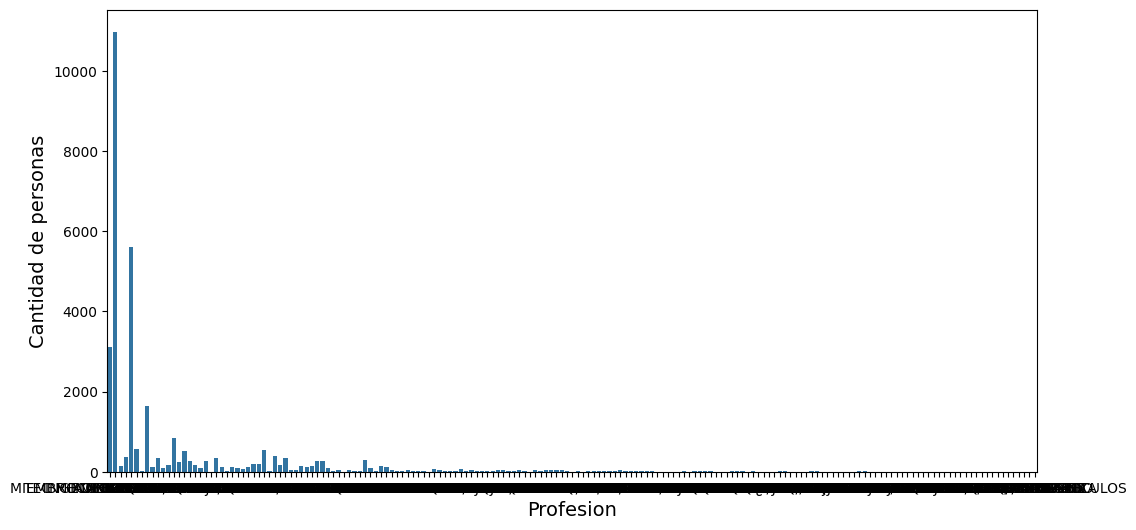

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='PROFESION')

plt.xlabel('Profesion', fontsize=14)
plt.ylabel('Cantidad de personas', fontsize=14)

plt.show()


In [ ]:
# Analizando respecto a la variable target
df[['PROFESION','FLG_DEFAULT_12M']].groupby(['PROFESION'], as_index=False)\
                                      .agg(['count','sum','mean'])\
                                      .sort_values(by=('FLG_DEFAULT_12M','sum'),ascending=False)\
                                      .head(10)


PROFESION FLG_DEFAULT_12M               
                                       count  sum      mean
147                  TECNICO           10980  843  0.076776
3              ADMINISTRADOR            5611  370  0.065942
54                 INGENIERO            3114  123  0.039499
94         OBRERO / OPERADOR             832   67  0.080529
31                  CONTADOR            1643   65  0.039562
85                  MECANICO             521   44  0.084453
144  TEC MECANICO INDUSTRIAL             335   35  0.104478
143  TEC MECANICO AUTOMOTRIZ             356   29  0.081461
57           INGENIERO CIVIL             277   26  0.093863
1                    ABOGADO             532   24  0.045113

# 4. WoE e IV
Definimos una función para calcular WoE e IV

In [ ]:
def calculate_woe_iv(dataset, feature_cat, target):
  lst=[]
  feature = feature_cat
  for i in range(dataset[feature].nunique()):
    val = list(dataset[feature].unique())[i]
    lst.append({
        'Value': val,
        'All' : dataset[dataset[feature] == val].count()[feature],
        'Bueno' : dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
        'Malo' : dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
    })

  dset = pd.DataFrame(lst)
  dset['Distr_Good'] = dset['Bueno']/dset['Bueno'].sum()
  dset['Distr_Bad'] = dset['Malo']/dset['Malo'].sum()

  dset['WoE'] = np.log(dset['Distr_Good']/dset['Distr_Bad'])
  dset = dset.replace({'WoE':{np.inf:0, -np.inf:0}}) #evitamos infinitos

  dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad'])*dset['WoE']
  iv = dset['IV'].sum()

  dset = dset.sort_values(by='WoE')
  return iv, dset

# nunique() Cuenta cuántos valores únicos
# dataset[feature].unique()  lista de los valores únicos en la columna feature.


In [ ]:
def getFeatureIV_Importance(df, features, target):
  featureIV_Importance = list()
  # feature, target
  for v in features:
    iv, rep = calculate_woe_iv(df, v, target)
    featureIV_Importance.append(iv)

  display(pd.DataFrame({'Feature':features, 'IV':featureIV_Importance}).sort_values('IV'))

In [ ]:
# Valor de IV para Segmento del cliente
IV_v, ReporteWoE_v = calculate_woe_iv(df, 'SEGMENTOCLIENTE_Encoder','FLG_DEFAULT_12M')
print('Information value:',IV_v)
print(ReporteWoE_v)

# De acuerdo a la tabla de equivalencia, la variable tiene un poder\
# predictivo débil cerca al mediano (a revisar)

Information value: 0.07390479566465086
   Value    All  Bueno  Malo  Distr_Good  Distr_Bad       WoE        IV
3      3      6      5     1    0.000167   0.000494 -1.084013  0.000354
0      0  22101  20484  1617    0.684626   0.798913 -0.154380  0.017644
1      1   9553   9152   401    0.305882   0.198123  0.434315  0.046802
2      2    284    279     5    0.009325   0.002470  1.328322  0.009105


In [ ]:
# IV para Zona de desembolso
IV_v, ReporteWoE_v = calculate_woe_iv(df, 'ZONA_DEL_DESEMBOLSO','FLG_DEFAULT_12M')
print('Information value:',IV_v)

Information value: 0.07557449949392235


In [ ]:
# IV para Profesión
IV_v, ReporteWoE_v = calculate_woe_iv(df, 'PROFESION','FLG_DEFAULT_12M')
print('Information value:',IV_v)

# Poder prodectivo mediano

Information value: 0.1442179824965159


In [ ]:
# IV para Estado Civil
IV_v, ReporteWoE_v = calculate_woe_iv(df, 'ESTADO_CIVIL','FLG_DEFAULT_12M')
print('Information value:',IV_v)

Information value: 0.05611247919815237


### Analizando la var. numérica "Clasificacion sistema ultimos 12 meses"

In [ ]:
# Cantidad de valores nulos
df.isna().sum()

# "CLASIF_SISTEMA_ULT_12M" tiene 1407 valores nulos

,0
CODMES,0
CODSOLICITUD,0
DEUDA,0
PLAZO_CREDITO,0
FLG_GARANTIA,0
MIN_MES_DE_DEFAULT,28495
FLG_DEFAULT_12M,0
SEGMENTOCLIENTE,0
TARJETA_RELACIONADA,0
VEHICULAR_RELACIONADA,0


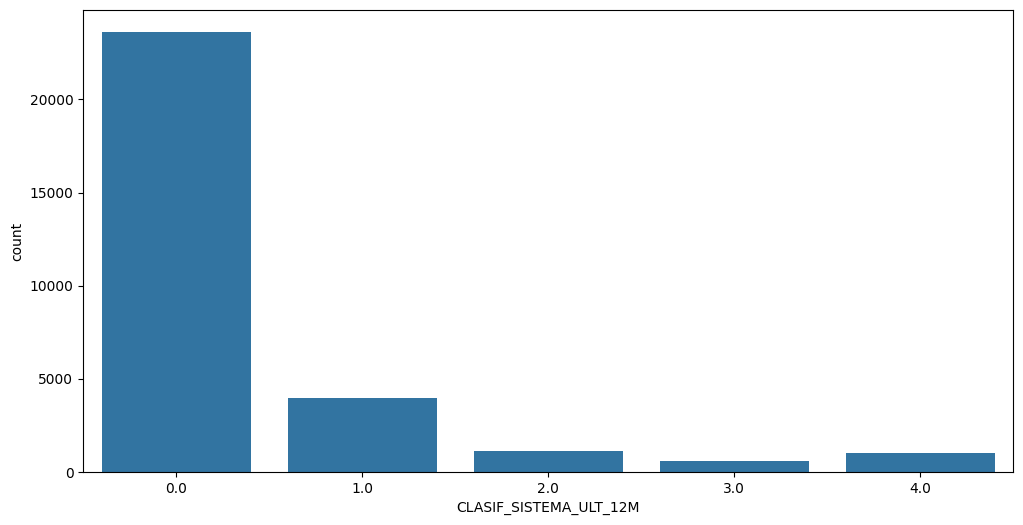

In [ ]:
# Análisis Univariado
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='CLASIF_SISTEMA_ULT_12M')
plt.show()

In [ ]:
df['CLASIF_SISTEMA_ULT_12M'].value_counts(1)

,proportion
CLASIF_SISTEMA_ULT_12M,
0.0,0.780791
1.0,0.131387
2.0,0.036331
4.0,0.032896
3.0,0.018595


In [ ]:
# Análisis Bivariado
df[['CLASIF_SISTEMA_ULT_12M', 'FLG_DEFAULT_12M']].groupby(['CLASIF_SISTEMA_ULT_12M'], as_index=False)\
                                                  .agg(['count','sum','mean'])\
                                                  .sort_values(by=('FLG_DEFAULT_12M','mean'), ascending=False)

CLASIF_SISTEMA_ULT_12M FLG_DEFAULT_12M                
                                   count   sum      mean
4                    4.0             996   177  0.177711
2                    2.0            1100   105  0.095455
3                    3.0             563    52  0.092362
1                    1.0            3978   336  0.084465
0                    0.0           23640  1226  0.051861

# 5. Obteniendo Train y Test

In [ ]:
# Las columnas que tenemos
df.columns

Index(['CODMES', 'CODSOLICITUD', 'DEUDA', 'PLAZO_CREDITO', 'FLG_GARANTIA',
       'MIN_MES_DE_DEFAULT', 'FLG_DEFAULT_12M', 'SEGMENTOCLIENTE',
       'TARJETA_RELACIONADA', 'VEHICULAR_RELACIONADA',
       'HIPOTECARIO_RELACIONADA', 'ATRASO_MAXIMO_ULT_6M',
       'ATRASO_MAXIMO_ULT_12M', 'ATRASO_MAXIMO_ULT_24M',
       'MESES_AHORROS_ULT_6M', 'MEDIANA_AHORROS_ULT_6M', 'DEUDA_TOTAL_SISTEMA',
       'CLASIF_SISTEMA_ULT_12M', 'FLG_PDH', 'NUMERO_DE_PAGOS_PDH',
       'MONTO_TC_SISTEMA', 'INGRESO_CLIENTE', 'PROFESION',
       'ZONA_DEL_DESEMBOLSO', 'ESTADO_CIVIL', 'EDAD_T', 'CUOTA', 'LINEA_DE_TC',
       'MONTO_TC_MEMBRESIA', 'FLG_TC_VISA', 'FLG_TC_MC',
       'SEGMENTOCLIENTE_Encoder'],
      dtype='object')

Existen distintas metologías de imputación de datos, en este caso tomaremos la imputación básica llenando todos con 0, por motivo de sencilles pues queremos ver el modelamiento

In [ ]:
# Imputación básica
df = df.fillna(0)

In [ ]:
# Las variables con mayor IVE y WoE serán las variables independientes
X = df[['PLAZO_CREDITO', 'FLG_GARANTIA',
        'MIN_MES_DE_DEFAULT', 'TARJETA_RELACIONADA',
        'VEHICULAR_RELACIONADA', 'HIPOTECARIO_RELACIONADA',
        'ATRASO_MAXIMO_ULT_6M', 'ATRASO_MAXIMO_ULT_12M',
        'ATRASO_MAXIMO_ULT_24M']]

# Variable independiente
y = df[['FLG_DEFAULT_12M']]

import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    train_size=0.65,
                                                                    test_size=0.35,
                                                                    random_state=123)

Realizaré un balanceo de datos, pues como se observó la cantidad de 0 es mucho mayor que la cantidad de 1 (Default), sin embargo son los que caen en default los que quiero predecir. Además, este balanceo de datos solo se realizará en los datos de entrenamiento (train)


## 5.1 Reconstruyendo Train

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)

# axis=1: Concatenar por columnas

In [ ]:
# Validación
df_train.head()

,PLAZO_CREDITO,FLG_GARANTIA,MIN_MES_DE_DEFAULT,TARJETA_RELACIONADA,VEHICULAR_RELACIONADA,HIPOTECARIO_RELACIONADA,ATRASO_MAXIMO_ULT_6M,ATRASO_MAXIMO_ULT_12M,ATRASO_MAXIMO_ULT_24M,FLG_DEFAULT_12M
19856,36,0,0.0,1,0,0,0,0.0,0.0,0
6008,48,0,0.0,1,0,0,0,2.0,2.0,0
16367,60,0,0.0,1,0,0,0,0.0,0.0,0
9376,48,0,201408.0,1,0,0,1,1.0,1.0,1
13654,24,0,0.0,1,0,0,0,0.0,0.0,0


In [ ]:
# Veamos cuantas clases de 0 y 1 existen
count_class_0, count_class_1 = df_train.FLG_DEFAULT_12M.value_counts()

df_class_0 = df_train[df_train['FLG_DEFAULT_12M'] == 0]
df_class_1 = df_train[df_train['FLG_DEFAULT_12M'] == 1]

In [ ]:
df_class_0['FLG_DEFAULT_12M'].value_counts()

,count
FLG_DEFAULT_12M,
0,19436


In [ ]:
df_class_1['FLG_DEFAULT_12M'].value_counts()

,count
FLG_DEFAULT_12M,
1,1327


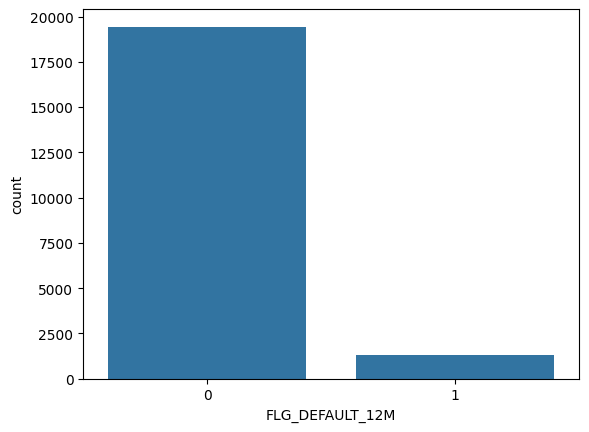

In [ ]:
#plt.figure(figsize=(12,6))
sns.countplot(data=df_train,x='FLG_DEFAULT_12M')
plt.show()

### UnderSampling
Técnica de balanceo básica para realizar mi modelo.

In [ ]:
# Reduciendo la categoría con mayor data
df_class_0_under = df_class_0.sample(count_class_1)

# cancatenando para obtener la data de train
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Estrategia under-sampling:')
print(df_train_under.FLG_DEFAULT_12M.value_counts())

# .sample(): tomará aleatoriamente la cantidad asignada

Estrategia under-sampling:
FLG_DEFAULT_12M
0    1327
1    1327
Name: count, dtype: int64


<Axes: xlabel='FLG_DEFAULT_12M', ylabel='count'>

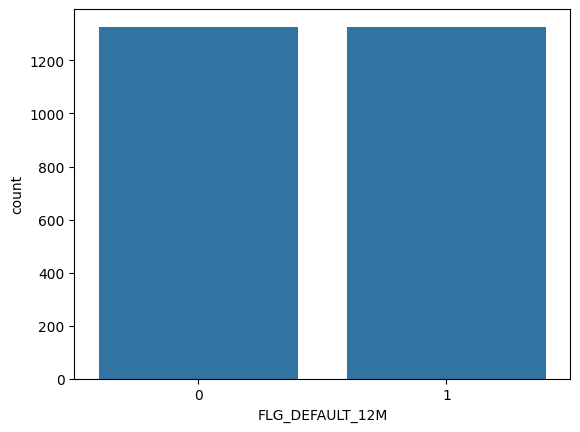

In [ ]:
sns.countplot(data=df_train_under, x='FLG_DEFAULT_12M')

### Oversampling
Esta otra técnica aumentará la cantidad de valores 1

In [ ]:
# Aumentando la categoría con menor data (clase 1)
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Data de train luego del oversampling: ', df_train_over.FLG_DEFAULT_12M.value_counts())

Data de train luego del oversampling:  FLG_DEFAULT_12M
0    19436
1    19436
Name: count, dtype: int64


<Axes: xlabel='FLG_DEFAULT_12M', ylabel='count'>

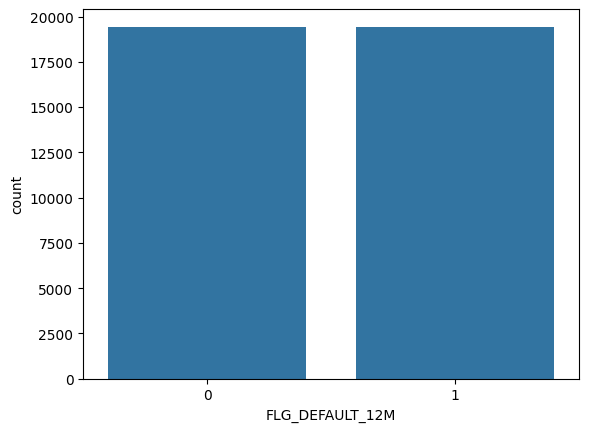

In [ ]:
sns.countplot(data=df_train_over, x='FLG_DEFAULT_12M')

In [ ]:
# Data de entrenamiento original
df_train.shape

(20763, 10)

In [ ]:
# Data de entrenamiento luego de undersampling
df_train_under.shape

(2654, 10)

In [ ]:
# Data de entrenamiento luego de oversampling
df_train_over.shape

(38872, 10)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20763 entries, 19856 to 19966
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PLAZO_CREDITO            20763 non-null  int64  
 1   FLG_GARANTIA             20763 non-null  int64  
 2   MIN_MES_DE_DEFAULT       20763 non-null  float64
 3   TARJETA_RELACIONADA      20763 non-null  int64  
 4   VEHICULAR_RELACIONADA    20763 non-null  int64  
 5   HIPOTECARIO_RELACIONADA  20763 non-null  int64  
 6   ATRASO_MAXIMO_ULT_6M     20763 non-null  int64  
 7   ATRASO_MAXIMO_ULT_12M    20763 non-null  float64
 8   ATRASO_MAXIMO_ULT_24M    20763 non-null  float64
 9   FLG_DEFAULT_12M          20763 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.7 MB


# 6. Modelamiento
Modelo con los tres dataset de train usando un árbol de decisión para realizar una comparativa

## 6.1 Train Original


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

model = DecisionTreeClassifier()

# Entrenamiento
model.fit(X_train, y_train)

# Validando en el test
y_pred = model.predict(X_test)

In [ ]:
# Evaluando
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy de datos originales: %f' %accuracy)

ll = log_loss(y_test, y_pred)
print('Log loss:', ll)

Accuracy de datos originales: 0.958412
Log loss: 1.4989981956837024


In [ ]:
# Matriz de confusión
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

print('Matriz de confusión: \n', conf_matrix)

Matriz de confusión: 
 [[10245   239]
 [  226   471]]


In [ ]:
print('Métricas con data train original\n', classification_report(y_test,y_pred))

Métricas con data train original
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     10484
           1       0.66      0.68      0.67       697

    accuracy                           0.96     11181
   macro avg       0.82      0.83      0.82     11181
weighted avg       0.96      0.96      0.96     11181



## 6.2 Train UnderSampling

In [ ]:
# Data de train bajo la técnica de undersampling
df_train_under.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, 20018 to 5664
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PLAZO_CREDITO            2654 non-null   int64  
 1   FLG_GARANTIA             2654 non-null   int64  
 2   MIN_MES_DE_DEFAULT       2654 non-null   float64
 3   TARJETA_RELACIONADA      2654 non-null   int64  
 4   VEHICULAR_RELACIONADA    2654 non-null   int64  
 5   HIPOTECARIO_RELACIONADA  2654 non-null   int64  
 6   ATRASO_MAXIMO_ULT_6M     2654 non-null   int64  
 7   ATRASO_MAXIMO_ULT_12M    2654 non-null   float64
 8   ATRASO_MAXIMO_ULT_24M    2654 non-null   float64
 9   FLG_DEFAULT_12M          2654 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 228.1 KB


In [ ]:
# Separando la variable target
X_train_under = df_train_under[['PLAZO_CREDITO', 'FLG_GARANTIA',
                                'MIN_MES_DE_DEFAULT', 'TARJETA_RELACIONADA',
                                'VEHICULAR_RELACIONADA', 'HIPOTECARIO_RELACIONADA',
                                'ATRASO_MAXIMO_ULT_6M', 'ATRASO_MAXIMO_ULT_12M',
                                'ATRASO_MAXIMO_ULT_24M']]
y_train_under = df_train_under[['FLG_DEFAULT_12M']]

In [ ]:
# cargando modelo
model_under = DecisionTreeClassifier()

# Entrenamiento
model_under.fit(X_train_under, y_train_under)

DecisionTreeClassifier()

In [ ]:
# Validando en el test
y_pred_under = model_under.predict(X_test)


In [ ]:
# Evaluando
accuracy = accuracy_score(y_test, y_pred_under)
print('Accuracy - Data undersamlping %f' %accuracy)

Accuracy - Data undersamlping 0.957696


In [ ]:
# Matriz de confusión
conf_matrix_u = confusion_matrix(y_true = y_test, y_pred =y_pred_under)
print('Matriz de confusión UNDERSAMPLING\n', conf_matrix_u)
print('Métricas - UNDERSAMPLING\n', classification_report(y_test, y_pred_under))

Matriz de confusión UNDERSAMPLING
 [[10034   450]
 [   23   674]]
Métricas - UNDERSAMPLING
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     10484
           1       0.60      0.97      0.74       697

    accuracy                           0.96     11181
   macro avg       0.80      0.96      0.86     11181
weighted avg       0.97      0.96      0.96     11181



## 6.3 Train OverSampling

In [ ]:
# Data de train bajo la técnica de oversampling
df_train_over.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38872 entries, 19856 to 16823
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PLAZO_CREDITO            38872 non-null  int64  
 1   FLG_GARANTIA             38872 non-null  int64  
 2   MIN_MES_DE_DEFAULT       38872 non-null  float64
 3   TARJETA_RELACIONADA      38872 non-null  int64  
 4   VEHICULAR_RELACIONADA    38872 non-null  int64  
 5   HIPOTECARIO_RELACIONADA  38872 non-null  int64  
 6   ATRASO_MAXIMO_ULT_6M     38872 non-null  int64  
 7   ATRASO_MAXIMO_ULT_12M    38872 non-null  float64
 8   ATRASO_MAXIMO_ULT_24M    38872 non-null  float64
 9   FLG_DEFAULT_12M          38872 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.3 MB


In [ ]:
# Separando la variable target
X_train_over = df_train_over[['PLAZO_CREDITO', 'FLG_GARANTIA',
                                'MIN_MES_DE_DEFAULT', 'TARJETA_RELACIONADA',
                                'VEHICULAR_RELACIONADA', 'HIPOTECARIO_RELACIONADA',
                                'ATRASO_MAXIMO_ULT_6M', 'ATRASO_MAXIMO_ULT_12M',
                                'ATRASO_MAXIMO_ULT_24M']]
y_train_over = df_train_over[['FLG_DEFAULT_12M']]

In [ ]:
# Modelo
model_over = DecisionTreeClassifier()

# Entrenamiento
model_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [ ]:
# Validando
y_pred_over = model_over.predict(X_test)

# Evaluando
accuracy = accuracy_score(y_test, y_pred_over)
print('Accuracy con data Oversampling %f' %accuracy)

Accuracy con data Oversampling 0.959843


In [ ]:
# Matriz de confusión
conf_matrix_o = confusion_matrix(y_true = y_test, y_pred =y_pred_over)
print('Matriz de confusión OVERSAMPLING\n', conf_matrix_o)
print('Métricas con data OVERSAMPLING\n', classification_report(y_test, y_pred_over))

Matriz de confusión OVERSAMPLING
 [[10118   366]
 [   83   614]]
Métricas con data OVERSAMPLING
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     10484
           1       0.63      0.88      0.73       697

    accuracy                           0.96     11181
   macro avg       0.81      0.92      0.86     11181
weighted avg       0.97      0.96      0.96     11181



Dado que mi objetivo es detectar la mayor cantidad posible de defaults (etiqueta 1), incluso a costa de tener más falsos positivos, el modelo con data undersampling es el más efectivo al tener un RECALL de 98%.



# 7. XGBoost
En esta sección usaré la data de train que fue balanceada por UNDERSAMPLING, luego de comparar y determinar que fue la data con la cual el modelo de decission Tree obtuvo mayor recall.

In [ ]:
# Importanto el modelo XGBoost
import xgboost as xgb

# Con parámetros por defecto
model1 = xgb.XGBClassifier()


In [ ]:
# Con otros parámetros
model2 = xgb.XGBClassifier(n_estimators=20, #árboles
                           max_depth=8, #profundidad
                           learning_rate=0.1,
                           subsample=0.5) #aleatoriedad de los registros

In [ ]:
# Entrenamiento modelo 1
model1.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Entrenamiento modelo 2
model2.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predicción
y_pred_xgb1 = model1.predict(X_test)
y_pred_xgb2 = model2.predict(X_test)


In [ ]:
# Matriz de confusión del modelo 1
conf_matrix_xgb1 = confusion_matrix(y_true = y_test, y_pred =y_pred_xgb1)
print('Matriz de confusión XGB_1: \n', conf_matrix_xgb1)
print('Métricas del modelo XGB 1 \n', classification_report(y_test, y_pred_xgb1))

Matriz de confusión XGB_1: 
 [[10010   474]
 [    5   692]]
Métricas del modelo XGB 1 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     10484
           1       0.59      0.99      0.74       697

    accuracy                           0.96     11181
   macro avg       0.80      0.97      0.86     11181
weighted avg       0.97      0.96      0.96     11181



In [ ]:
# Matriz de confusión del modelo 2
conf_matrix_xgb2 = confusion_matrix(y_true = y_test, y_pred =y_pred_xgb2)
print('Matriz de confusión XGB_2: \n', conf_matrix_xgb2)
print('Métricas del modelo XGB_2 \n', classification_report(y_test, y_pred_xgb2))

Matriz de confusión XGB_2: 
 [[10018   466]
 [    4   693]]
Métricas del modelo XGB_2 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     10484
           1       0.60      0.99      0.75       697

    accuracy                           0.96     11181
   macro avg       0.80      0.97      0.86     11181
weighted avg       0.97      0.96      0.96     11181



# 8. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Modelo sin modificacion de argumentos
model_rf_1 = RandomForestClassifier()

In [ ]:
# Modelo definiendo cantidad de árboles y profundidad
model_rf_2 = RandomForestClassifier(n_estimators=20, # árboles
                                    max_depth=8) # profundidad

In [ ]:
# Entrenamiento RF_1
model_rf_1.fit(X_train_under, y_train_under)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
# Entrenamiento RF_2: .fit()
model_rf_2.fit(X_train_under, y_train_under)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=8, n_estimators=20)

In [ ]:
# Test RF_1: .predict()
y_pred_RF_1 = model_rf_1.predict(X_test)

# Test RF_2: .predict()
y_pred_RF_2 = model_rf_2.predict(X_test)

In [ ]:
# Matriz de confusión del modelo RF_1:
conf_matrix_rf1 = confusion_matrix(y_true = y_test, y_pred =y_pred_RF_1)
print('Matriz de confusión RF 1: \n', conf_matrix_rf1)
print('Métricas del modelo RF 1 \n', classification_report(y_test, y_pred_RF_1))

Matriz de confusión RF 1: 
 [[10015   469]
 [   12   685]]
Métricas del modelo RF 1 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     10484
           1       0.59      0.98      0.74       697

    accuracy                           0.96     11181
   macro avg       0.80      0.97      0.86     11181
weighted avg       0.97      0.96      0.96     11181



In [ ]:
# Matriz de confusión del modelo RF_2:
conf_matrix_rf2 = confusion_matrix(y_true = y_test, y_pred = y_pred_RF_2)
print('Matriz de confusión RF 2: \n',conf_matrix_rf2)
print('Métricas del modelo RF 2: \n', classification_report(y_test, y_pred_RF_2))

Matriz de confusión RF 2: 
 [[10006   478]
 [    0   697]]
Métricas del modelo RF 2: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     10484
           1       0.59      1.00      0.74       697

    accuracy                           0.96     11181
   macro avg       0.80      0.98      0.86     11181
weighted avg       0.97      0.96      0.96     11181



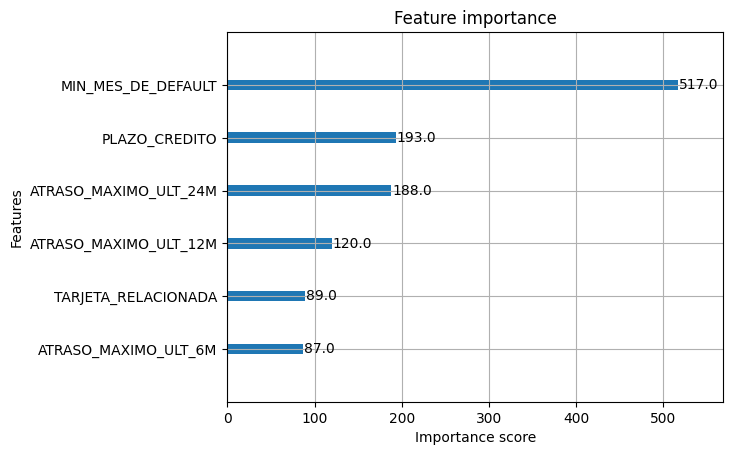

In [ ]:
# Feature Importance con XGBoost
from xgboost import plot_importance

# Para el modelo XGB 1
plot_importance(model1)
plt.show()

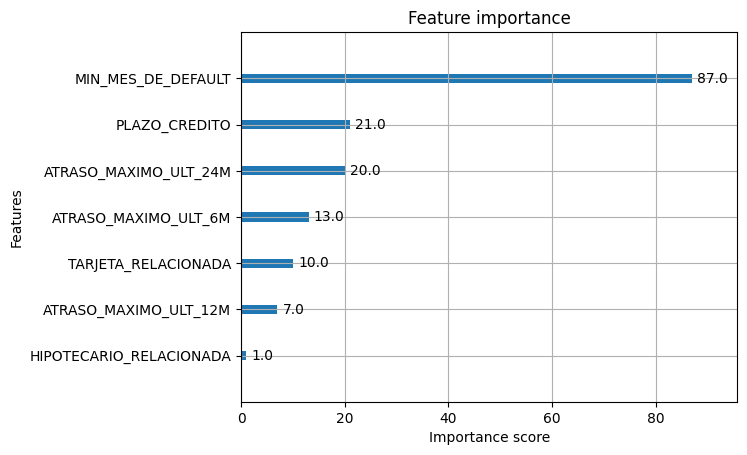

In [ ]:
# Para el modelo XGB 2
plot_importance(model2)
plt.show()

# Modelos de Ridge y Lasso

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

In [ ]:
# Definiendo el modelo RIDGE (Penalización L2)
modelo_RG = Ridge(alpha = 1.0) # parámetro de regularización

_ = modelo_RG.fit(X= X_train_under, y = y_train_under)
# El modelo se guarda en "modelo_RG"

In [ ]:
# coeficientes del modelo Ridge

modelo_RG.coef_.flatten()

array([-2.54549785e-04,  3.41106856e-02,  4.71761286e-06, -3.53730311e-03,
        6.57390191e-03, -3.77530935e-02, -1.16812579e-03,  2.59491049e-04,
       -8.27729438e-05])

In [ ]:
# Coef de cada variable
df_coeficientes = pd.DataFrame({'predictor': X_train_under.columns,
                                'coef': modelo_RG.coef_.flatten()})

df_coeficientes

,predictor,coef
0,PLAZO_CREDITO,-0.000255
1,FLG_GARANTIA,0.034111
2,MIN_MES_DE_DEFAULT,0.000005
3,TARJETA_RELACIONADA,-0.003537
4,VEHICULAR_RELACIONADA,0.006574
5,HIPOTECARIO_RELACIONADA,-0.037753
6,ATRASO_MAXIMO_ULT_6M,-0.001168
7,ATRASO_MAXIMO_ULT_12M,0.000259
8,ATRASO_MAXIMO_ULT_24M,-0.000083


Text(0.5, 1.0, 'Coeficientes del modelo')

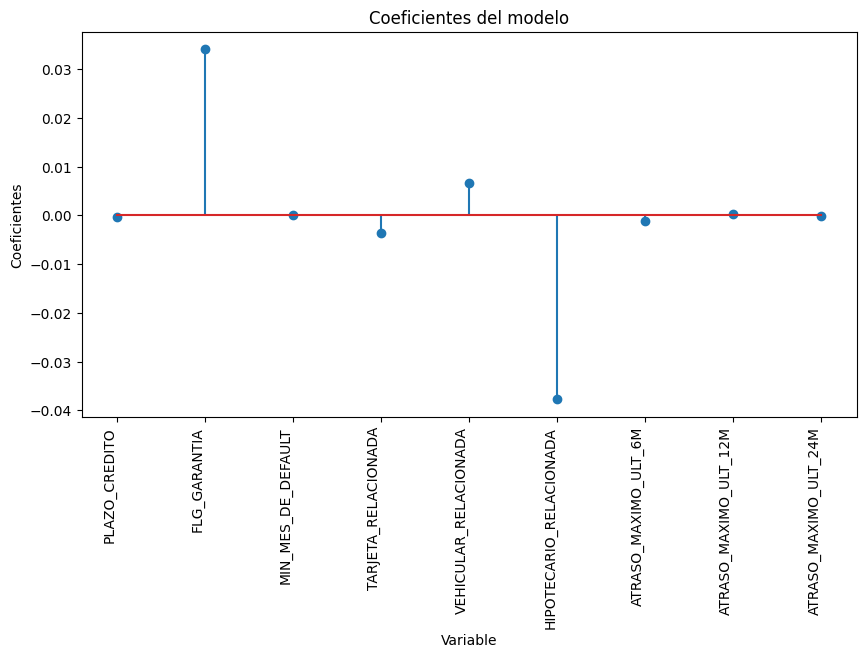

In [ ]:
#  gráfica tipo stem
fig, ax = plt.subplots(figsize=(10,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef)

plt.xticks(rotation=90, ha='right')
ax.set_xlabel('Variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo')